In [2]:
import numpy as np
from tslearn.clustering import TimeSeriesKMeans
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
from fastdtw import fastdtw
from pyts.approximation import DiscreteFourierTransform
from tslearn.clustering import silhouette_score 
import pandas as pd
import seaborn as sns

In [3]:
y_train=pd.read_csv('RavdessAudioOnlyNumpy__Y_train.csv')

In [4]:
x_train_sax_big=np.load('X_train_sax_big.npy')
x_train_sax_big=np.squeeze(x_train_sax_big)

In [4]:
x_train_sax_small=np.load('X_train_sax_small.npy')
x_train_sax_small=np.squeeze(x_train_sax_small)

In [3]:
x_train_dft=np.load('X_train_dft.npy')


## DFT

### Euclidean

In [11]:
max_k=10
sse_dft_e = []
silhouette_scores_dft_e = []

for k in range(2, max_k+1):
    kmeans = TimeSeriesKMeans(n_clusters=k, max_iter=5, random_state=0, metric='euclidean')
    kmeans.fit(x_train_dft)
    sse_dft_e.append(kmeans.inertia_)
    print(f'{k}th fit done')
    
    # Calculate silhouette coefficient
    labels_dft_e = kmeans.labels_
    silhouette = silhouette_score(x_train_dft, labels_dft_e, metric='euclidean')
    silhouette_scores_dft_e.append(silhouette)
    print(f'{k}th append done')





2th fit done
2th append done
3th fit done
3th append done
4th fit done
4th append done
5th fit done
5th append done
6th fit done
6th append done
7th fit done
7th append done
8th fit done
8th append done
9th fit done
9th append done
10th fit done
10th append done


In [10]:
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = [8, 5]
plt.rcParams['figure.dpi'] = 200
plt.rcParams.update({'font.size': 15})

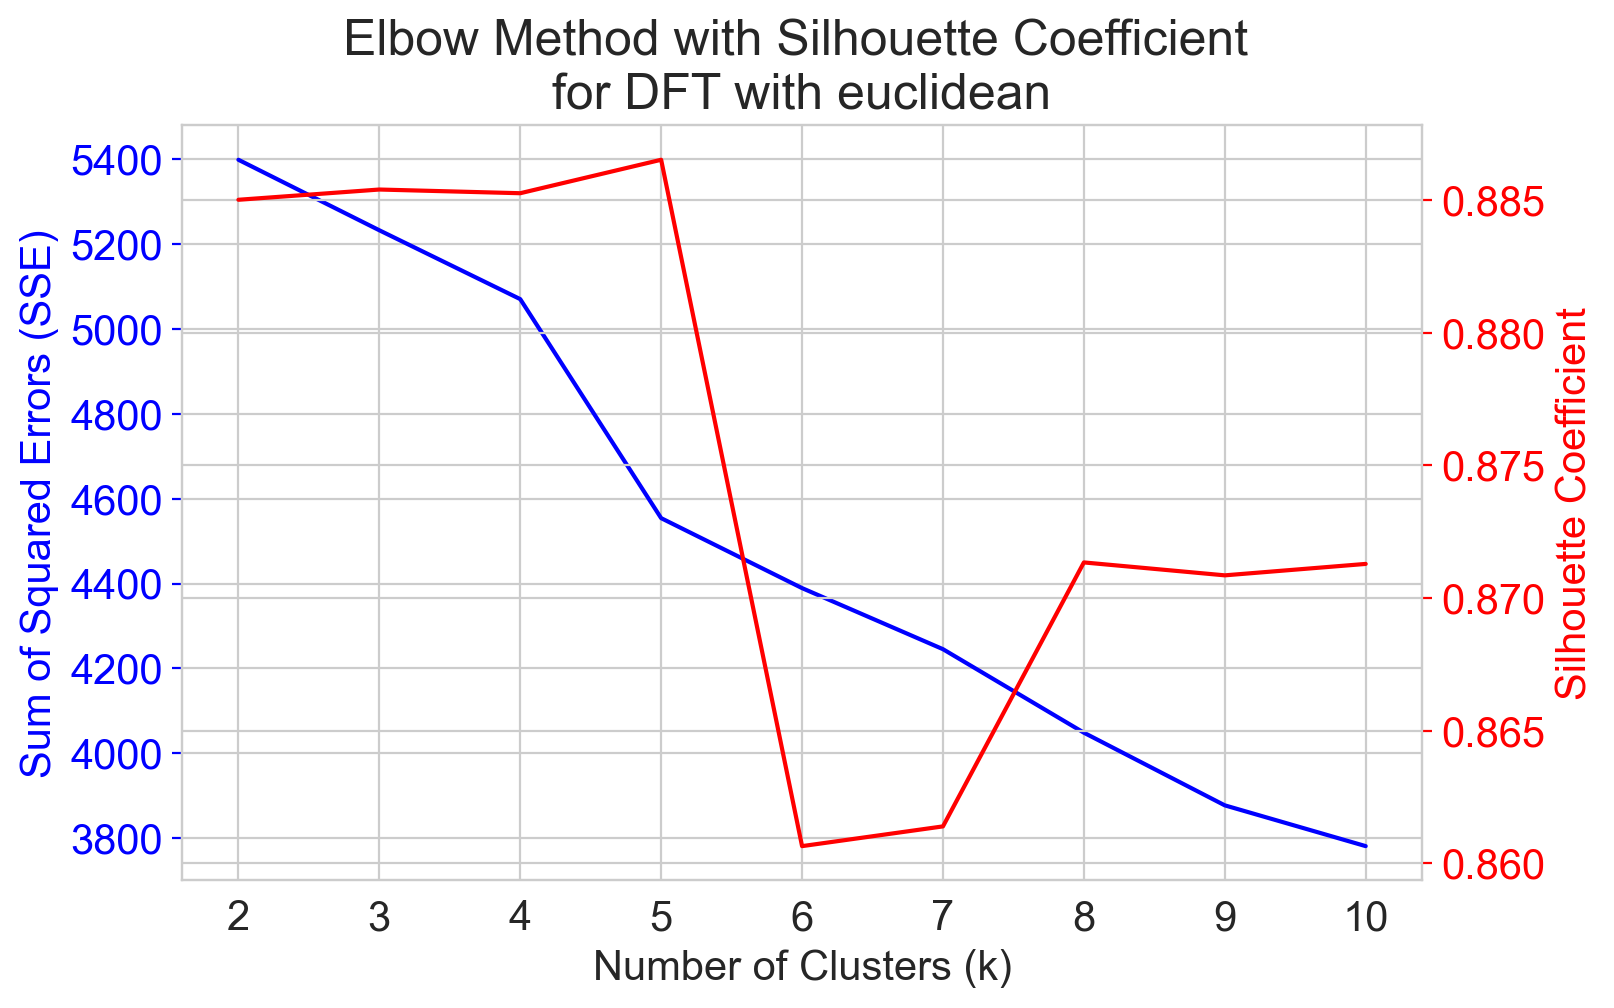

In [48]:
# Plot SSE and silhouette scores
fig, ax1 = plt.subplots()
ax1.plot(range(2, max_k + 1), sse_dft_e, 'b-')
ax1.set_xlabel('Number of Clusters (k)')
ax1.set_ylabel('Sum of Squared Errors (SSE)', color='b')
ax1.tick_params('y', colors='b')

ax2 = ax1.twinx()
ax2.plot(range(2, max_k + 1), silhouette_scores_dft_e, 'r-')
ax2.set_ylabel('Silhouette Coefficient', color='r')
ax2.tick_params('y', colors='r')

plt.title('Elbow Method with Silhouette Coefficient \nfor DFT with euclidean')
plt.show()


In [13]:
## Best k
km_sax= TimeSeriesKMeans(n_clusters=3, metric="euclidean", 
                      max_iter=5, random_state=0)
km_sax.fit(x_train_dft)
labels_dft_e=km_sax.labels_
c_counts_dft_e = pd.Series(labels_dft_e).value_counts().sort_index()
c_counts_dft_e

0    1822
1       5
2       1
dtype: int64

### DTW

In [14]:
max_k=10
sse_dft_d = []
silhouette_scores_dft_d = []

for k in range(2, max_k+1):
    kmeans = TimeSeriesKMeans(n_clusters=k, max_iter=5, random_state=0, metric='dtw')
    kmeans.fit(x_train_dft)
    sse_dft_d.append(kmeans.inertia_)
    print(f'{k}th fit done')
    
    # Calculate silhouette coefficient
    labels_dft_d = kmeans.labels_
    silhouette = silhouette_score(x_train_dft, labels_dft_d, metric='euclidean')
    silhouette_scores_dft_d.append(silhouette)
    print(f'{k}th append done')



2th fit done
2th append done
3th fit done
3th append done
4th fit done
4th append done
5th fit done
5th append done
6th fit done
6th append done
7th fit done
7th append done
8th fit done
8th append done
9th fit done
9th append done
10th fit done
10th append done


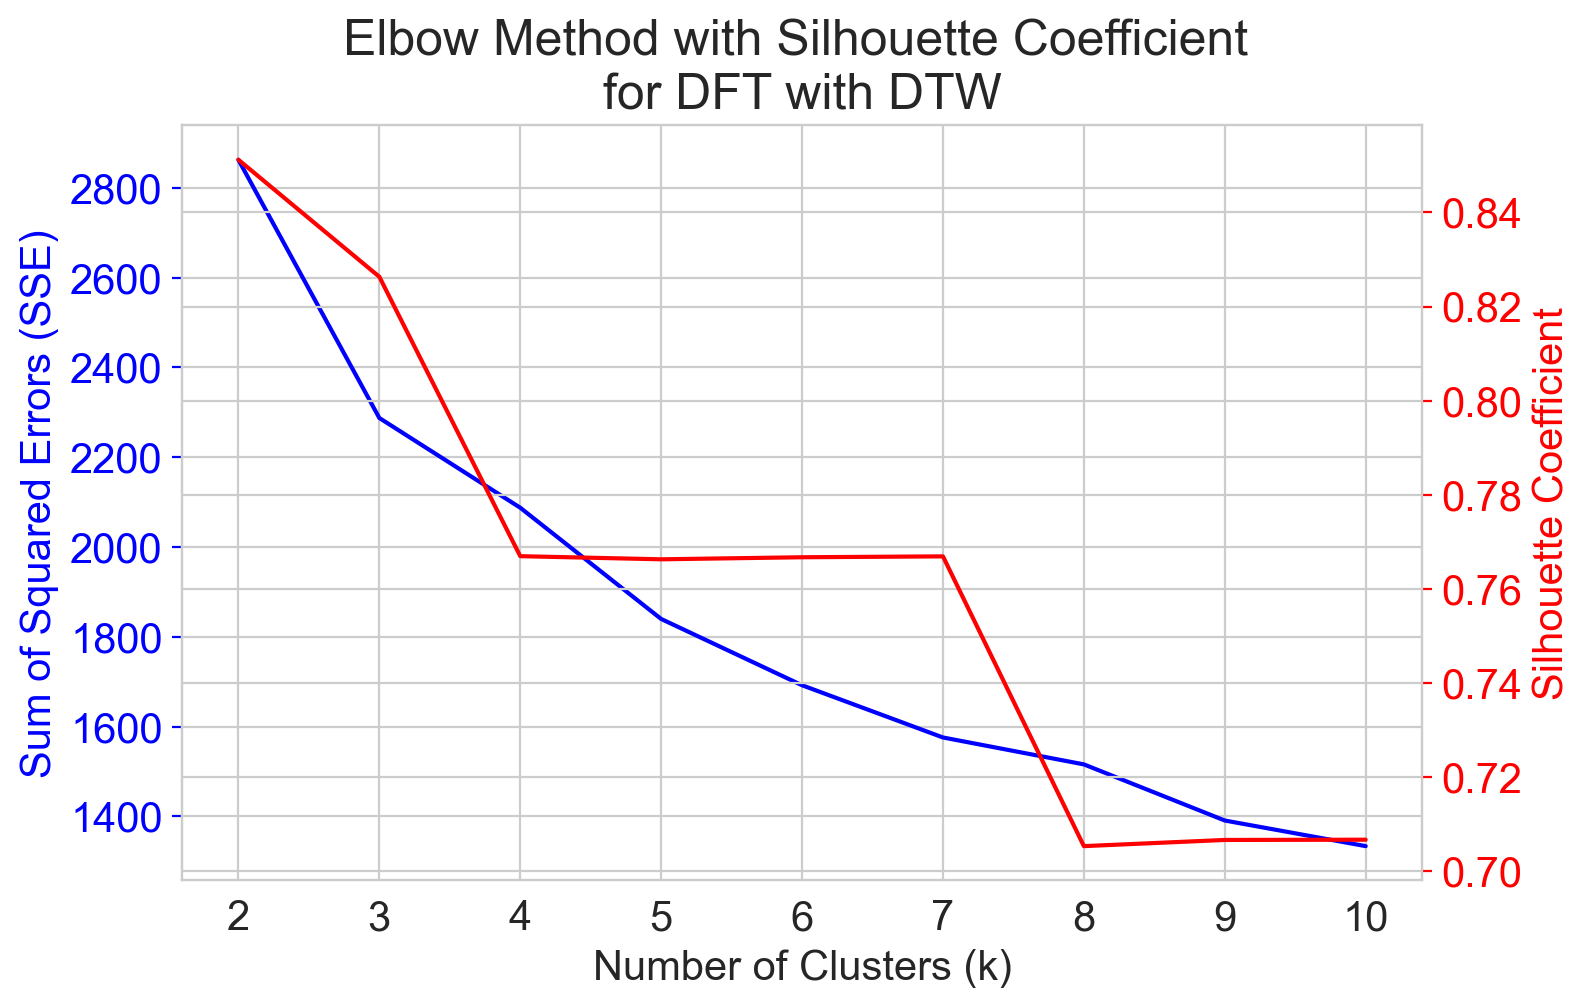

In [50]:
# Plot SSE and silhouette scores
fig, ax1 = plt.subplots()
ax1.plot(range(2, max_k + 1), sse_dft_d, 'b-')
ax1.set_xlabel('Number of Clusters (k)')
ax1.set_ylabel('Sum of Squared Errors (SSE)', color='b')
ax1.tick_params('y', colors='b')

ax2 = ax1.twinx()
ax2.plot(range(2, max_k + 1), silhouette_scores_dft_d, 'r-')
ax2.set_ylabel('Silhouette Coefficient', color='r')
ax2.tick_params('y', colors='r')

plt.title('Elbow Method with Silhouette Coefficient \nfor DFT with DTW')
plt.show()


In [7]:
## Best k
km_sax= TimeSeriesKMeans(n_clusters=3, metric="dtw", 
                      max_iter=5, random_state=0)
km_sax.fit(x_train_dft)
labels_dft_d=km_sax.labels_
c_counts_dft_d= pd.Series(labels_dft_d).value_counts().sort_index()
c_counts_dft_d

0    1694
1      17
2     117
dtype: int64

## SAX BIG

### Euclidean

In [7]:
max_k=10
sse_saxb_e = []
silhouette_scores_saxb_e = []

for k in range(2, max_k+1):
    kmeans = TimeSeriesKMeans(n_clusters=k, max_iter=5, random_state=0, metric='euclidean')
    kmeans.fit(x_train_sax_big)
    sse_saxb_e.append(kmeans.inertia_)
    print(f'{k}th fit done')
    
    # Calculate silhouette coefficient
    labels_saxb_e = kmeans.labels_
    silhouette = silhouette_score(x_train_sax_big, labels_saxb_e, metric='euclidean')
    silhouette_scores_saxb_e.append(silhouette)
    print(f'{k}th append done')





2th fit done
2th append done
3th fit done
3th append done
4th fit done
4th append done
5th fit done
5th append done
6th fit done
6th append done
7th fit done
7th append done
8th fit done
8th append done
9th fit done
9th append done
10th fit done
10th append done


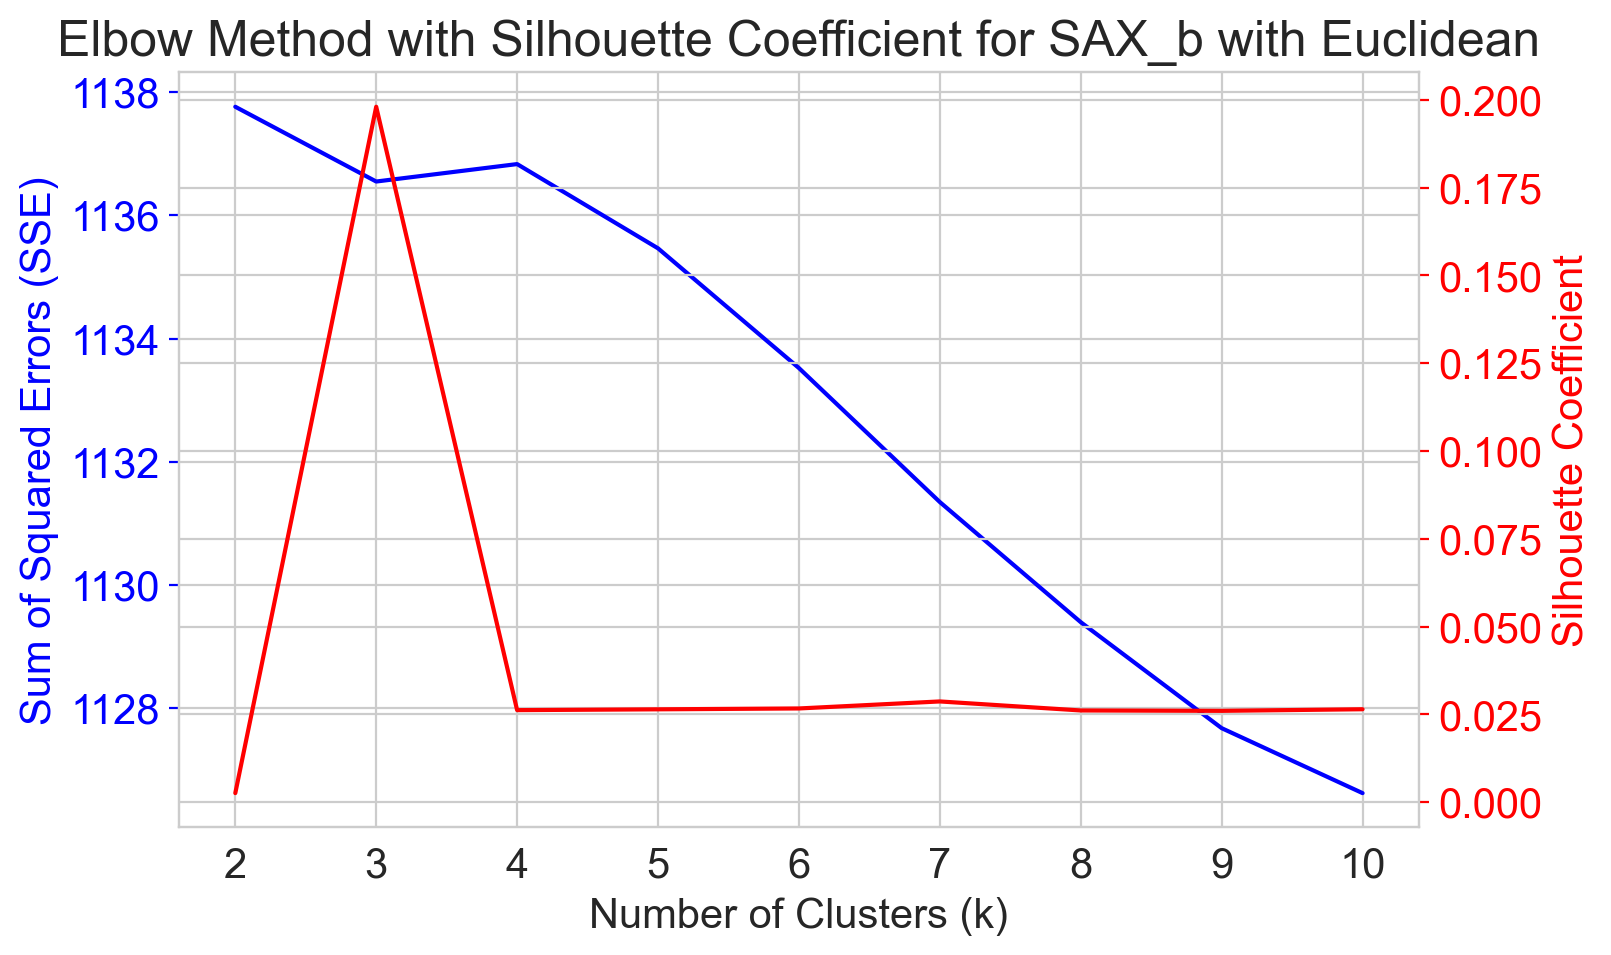

In [10]:
# Plot SSE and silhouette scores
fig, ax1 = plt.subplots()
ax1.plot(range(2, max_k + 1), sse_saxb_e, 'b-')
ax1.set_xlabel('Number of Clusters (k)')
ax1.set_ylabel('Sum of Squared Errors (SSE)', color='b')
ax1.tick_params('y', colors='b')

ax2 = ax1.twinx()
ax2.plot(range(2, max_k + 1), silhouette_scores_saxb_e, 'r-')
ax2.set_ylabel('Silhouette Coefficient', color='r')
ax2.tick_params('y', colors='r')

plt.title('Elbow Method with Silhouette Coefficient for SAX_b with Euclidean')
plt.show()


In [6]:
## Best k
km_sax= TimeSeriesKMeans(n_clusters=3, metric="euclidean", 
                      max_iter=5, random_state=0)
km_sax.fit(x_train_sax_big)
labels_saxb_e=km_sax.labels_
c_counts_saxb_e= pd.Series(labels_saxb_e).value_counts().sort_index()
c_counts_saxb_e

0      13
1      11
2    1804
dtype: int64

### DTW


In [4]:
max_k=10
sse_saxb_d = []
silhouette_scores_saxb_d = []

for k in range(2, max_k+1):
    kmeans = TimeSeriesKMeans(n_clusters=k, max_iter=5, random_state=0, metric='dtw')
    print(f'{k}th kmeans intialization done')

    kmeans.fit(x_train_sax_big)
    print(f'{k}th kmeans fit done')
    sse_saxb_d.append(kmeans.inertia_)
    
    
    # Calculate silhouette coefficient
    labels_saxb_d = kmeans.labels_
    silhouette = silhouette_score(x_train_sax_big, labels_saxb_d, metric='euclidean')
    silhouette_scores_saxb_d.append(silhouette)
    print(f'{k}th append done')





2th kmeans intialization done


In [ ]:
fig, ax1 = plt.subplots()
ax1.plot(range(2, max_k + 1), sse_saxb_d, 'b-')
ax1.set_xlabel('Number of Clusters (k)')
ax1.set_ylabel('Sum of Squared Errors (SSE)', color='b')
ax1.tick_params('y', colors='b')

ax2 = ax1.twinx()
ax2.plot(range(2, max_k + 1), silhouette_scores_saxb_d, 'r-')
ax2.set_ylabel('Silhouette Coefficient', color='r')
ax2.tick_params('y', colors='r')

plt.title('Elbow Method with Silhouette Coefficient for SAX_b with Euclidean')
plt.show()


In [6]:
km_sax= TimeSeriesKMeans(n_clusters=3, metric="softdtw", 
                      max_iter=5, random_state=0)
km_sax.fit(x_train_sax_big)
labels_saxb_d=km_sax.labels_
c_counts_saxb_d= pd.Series(labels_saxb_d).value_counts().sort_index()
c_counts_saxb_d

0    1124
1      33
2     671
dtype: int64

In [7]:
km_sax.inertia_

586560.7736726635

In [ ]:
silhouette_score(x_train_sax_big, labels_saxb_d)

## SAX SMALL

### Euclidean

In [20]:
max_k=10
sse_saxs_e = []
silhouette_scores_saxs_e = []

for k in range(2, max_k+1):
    kmeans = TimeSeriesKMeans(n_clusters=k, max_iter=5, random_state=0, metric='euclidean')
    kmeans.fit(x_train_sax_small)
    sse_saxs_e.append(kmeans.inertia_)
    print(f'{k}th fit done')
    
    # Calculate silhouette coefficient
    labels_saxs_e = kmeans.labels_
    silhouette = silhouette_score(x_train_sax_small, labels_saxs_e, metric='euclidean')
    silhouette_scores_saxs_e.append(silhouette)
    print(f'{k}th append done')





2th fit done
2th append done
3th fit done
3th append done
4th fit done
4th append done
5th fit done
5th append done
6th fit done
6th append done
7th fit done
7th append done
8th fit done
8th append done
9th fit done
9th append done
10th fit done
10th append done


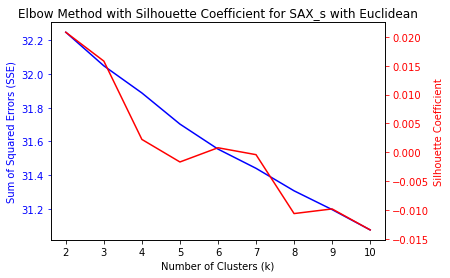

In [21]:
# Plot SSE and silhouette scores
fig, ax1 = plt.subplots()
ax1.plot(range(2, max_k + 1), sse_saxs_e, 'b-')
ax1.set_xlabel('Number of Clusters (k)')
ax1.set_ylabel('Sum of Squared Errors (SSE)', color='b')
ax1.tick_params('y', colors='b')

ax2 = ax1.twinx()
ax2.plot(range(2, max_k + 1), silhouette_scores_saxs_e, 'r-')
ax2.set_ylabel('Silhouette Coefficient', color='r')
ax2.tick_params('y', colors='r')

plt.title('Elbow Method with Silhouette Coefficient for SAX_s with Euclidean')
plt.show()


In [17]:
## Best k
km_sax= TimeSeriesKMeans(n_clusters=3, metric="euclidean", 
                      max_iter=5, random_state=0)
km_sax.fit(x_train_sax_small)
labels_saxs_e=km_sax.labels_
c_counts_saxs_e= pd.Series(labels_saxs_e).value_counts().sort_index()
c_counts_saxs_e

0    634
1    787
2    407
dtype: int64

### DTW

In [26]:
max_k=10
sse_saxs_d = []
silhouette_scores_saxs_d = []

for k in range(2, max_k+1):
    kmeans = TimeSeriesKMeans(n_clusters=k, max_iter=5, random_state=0, metric='dtw')
    kmeans.fit(x_train_sax_small)
    sse_saxs_d.append(kmeans.inertia_)
    print(f'{k}th fit done')
    
    # Calculate silhouette coefficient
    labels_saxs_d = kmeans.labels_
    silhouette = silhouette_score(x_train_sax_small, labels_saxs_d, metric='euclidean')
    silhouette_scores_saxs_d.append(silhouette)
    print(f'{k}th append done')



2th fit done
2th append done
3th fit done
3th append done
4th fit done
4th append done
5th fit done
5th append done
6th fit done
6th append done
7th fit done
7th append done
8th fit done
8th append done
9th fit done
9th append done
10th fit done
10th append done


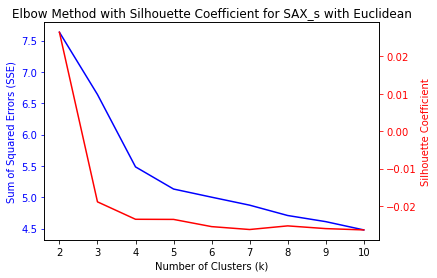

In [27]:

# Plot SSE and silhouette scores
fig, ax1 = plt.subplots()
ax1.plot(range(2, max_k + 1), sse_saxs_d, 'b-')
ax1.set_xlabel('Number of Clusters (k)')
ax1.set_ylabel('Sum of Squared Errors (SSE)', color='b')
ax1.tick_params('y', colors='b')

ax2 = ax1.twinx()
ax2.plot(range(2, max_k + 1), silhouette_scores_saxs_d, 'r-')
ax2.set_ylabel('Silhouette Coefficient', color='r')
ax2.tick_params('y', colors='r')

plt.title('Elbow Method with Silhouette Coefficient for SAX_s with Euclidean')
plt.show()


In [31]:
# Best k
km_sax= TimeSeriesKMeans(n_clusters=3, metric="dtw", 
                      max_iter=5, random_state=0)
km_sax.fit(x_train_sax_small)
labels_saxs_d=km_sax.labels_
c_counts_saxs_d= pd.Series(labels_saxs_d).value_counts().sort_index()
c_counts_saxs_d

0    877
1    790
2    161
dtype: int64

## Cluster visualization

In [8]:
sns.set_style("ticks")
plt.rcParams['figure.figsize'] = [8, 5]

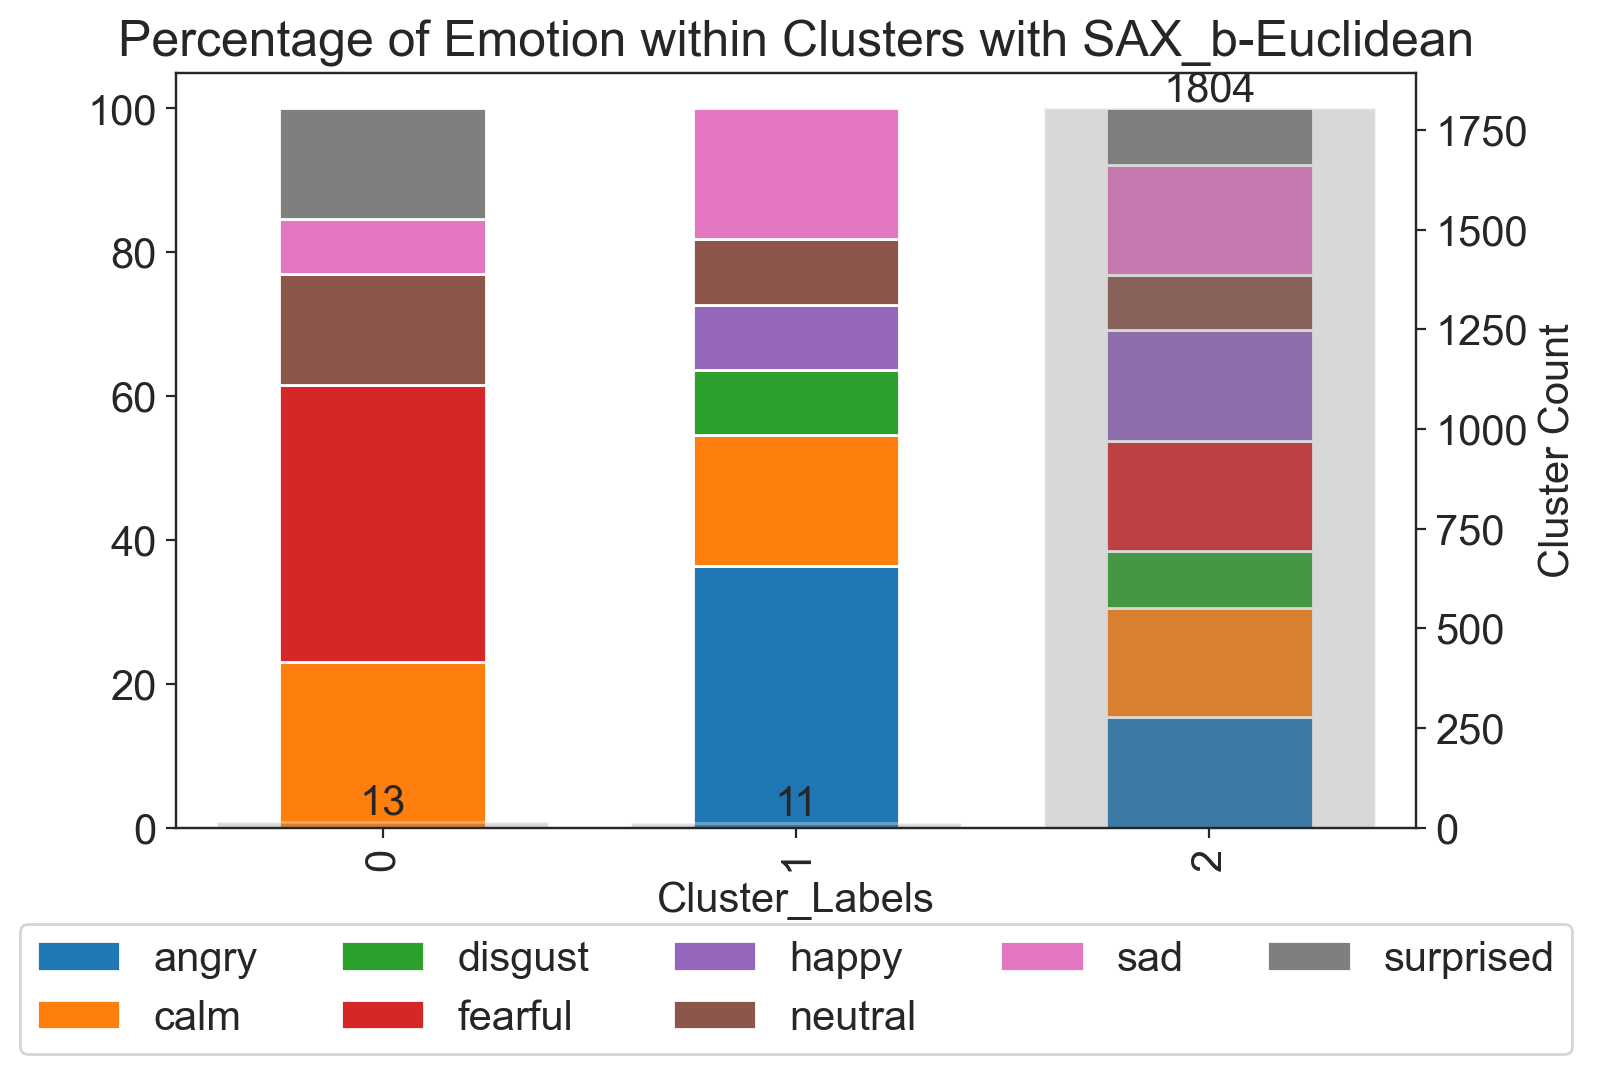

In [29]:
sns.set_style("ticks")
plt.rcParams['figure.figsize'] = [8, 5]
# Assuming 'cluster_labels' is the NumPy array or pandas Series containing the cluster labels
# Assuming 'y_train' is the DataFrame containing the 'emotion' attribute

# Add the cluster labels to the emotion DataFrame
y_train['Cluster_Labels'] = labels_saxb_e

# Calculate the percentage of each emotion within each cluster
grouped_data = y_train.groupby(['Cluster_Labels', 'emotion']).size()
cluster_totals = grouped_data.groupby('Cluster_Labels').sum()
percentages = grouped_data.div(cluster_totals, level='Cluster_Labels') * 100

# Reset the index and pivot the DataFrame to have emotions as columns
pivot_df = percentages.reset_index().pivot(index='Cluster_Labels', columns='emotion', values=0)

# Plot the bar chart for each cluster
#cluster_counts = pd.Series(cluster_labels).value_counts().sort_index()
ax = pivot_df.plot(kind='bar', stacked=True)

# Plot the cluster counts as a separate bar plot
ax2 = ax.twinx()
ax2.bar(c_counts_saxb_e.index, c_counts_saxb_e.values, alpha=0.3, color='gray')

# Add labels and title to the plot
plt.xlabel('Cluster')
plt.ylabel('Percentage')
plt.title('Percentage of Emotion within Clusters with SAX_b-Euclidean')
ax2.set_ylabel('Cluster Count')

# Annotate each bar with the cluster count
for i, v in enumerate(c_counts_saxb_e.values):
    ax2.text(i, v, str(v), ha='center', va='bottom')

# Show the legend
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),
          fancybox=True, shadow=False, ncol=5)

# Display the plot
plt.show()


In [15]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2)
X_train_saxs_tsne = tsne.fit_transform(x_train_sax_small)
X_train_saxs_tsne.shape


c:\Users\valif\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\valif\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


(1828, 2)

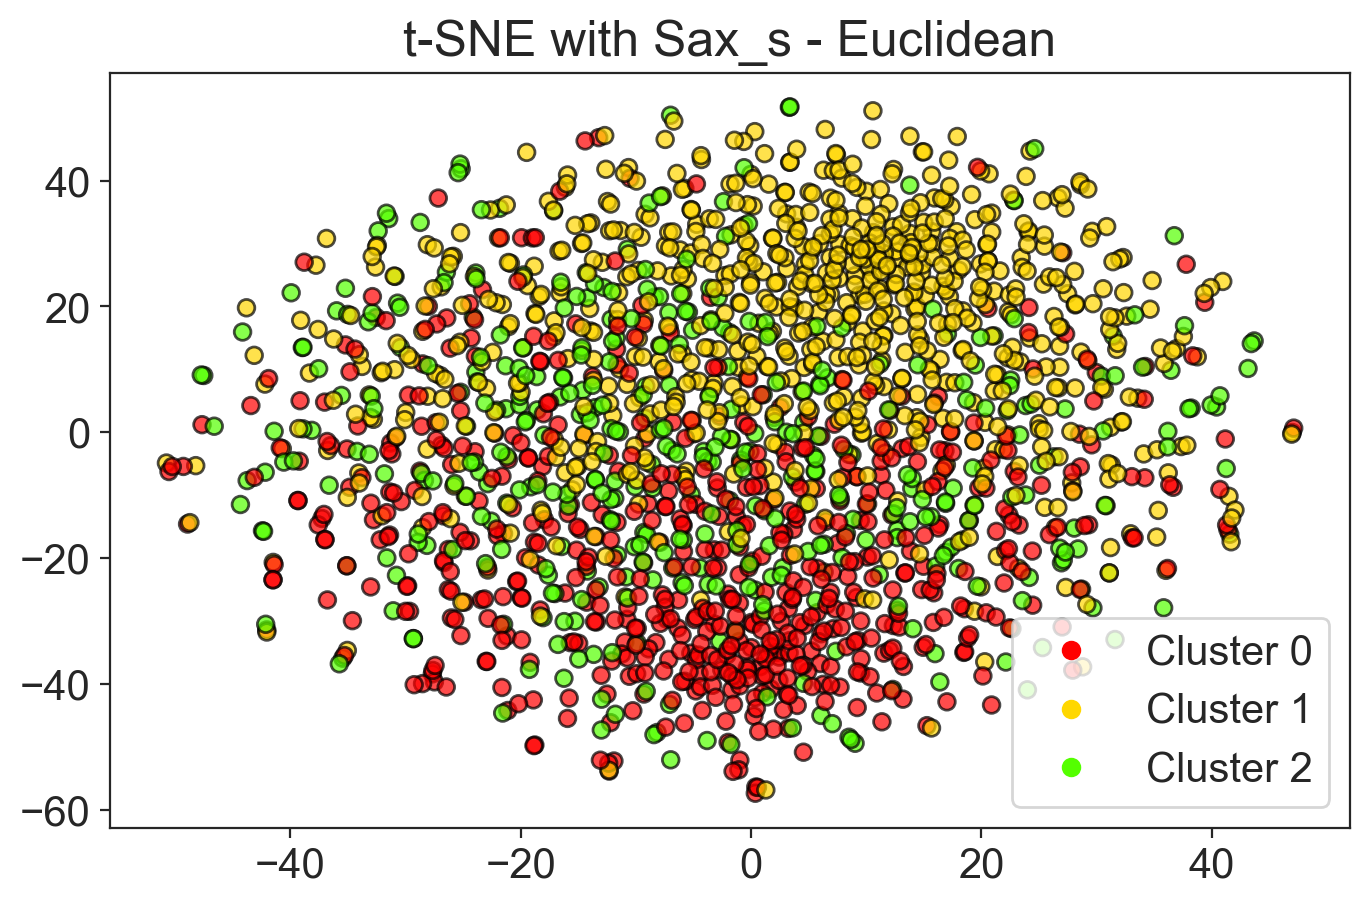

In [19]:
plt.scatter(X_train_saxs_tsne[:, 0], X_train_saxs_tsne[:, 1], c=labels_saxs_e, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)

# Assuming labels_saxs_e is a list/array containing the cluster labels for each data point

# Create a list of unique cluster labels
unique_labels = list(set(labels_saxs_e))

# Assign a color for each cluster label
colors = plt.cm.prism(np.linspace(0, 1, len(unique_labels)))

# Create a legend entry for each cluster label
legend_entries = []
for label, color in zip(unique_labels, colors):
    legend_entries.append(plt.Line2D([], [], marker='o', linestyle='', color=color, label=f'Cluster {label}'))

# Add the legend with the created entries
plt.legend(handles=legend_entries)
plt.title('t-SNE with Sax_s - Euclidean')
plt.show()


In [22]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(x_train_sax_small)
X_train_saxs_pca = pca.transform(x_train_sax_small)
X_train_saxs_pca.shape

(1828, 2)

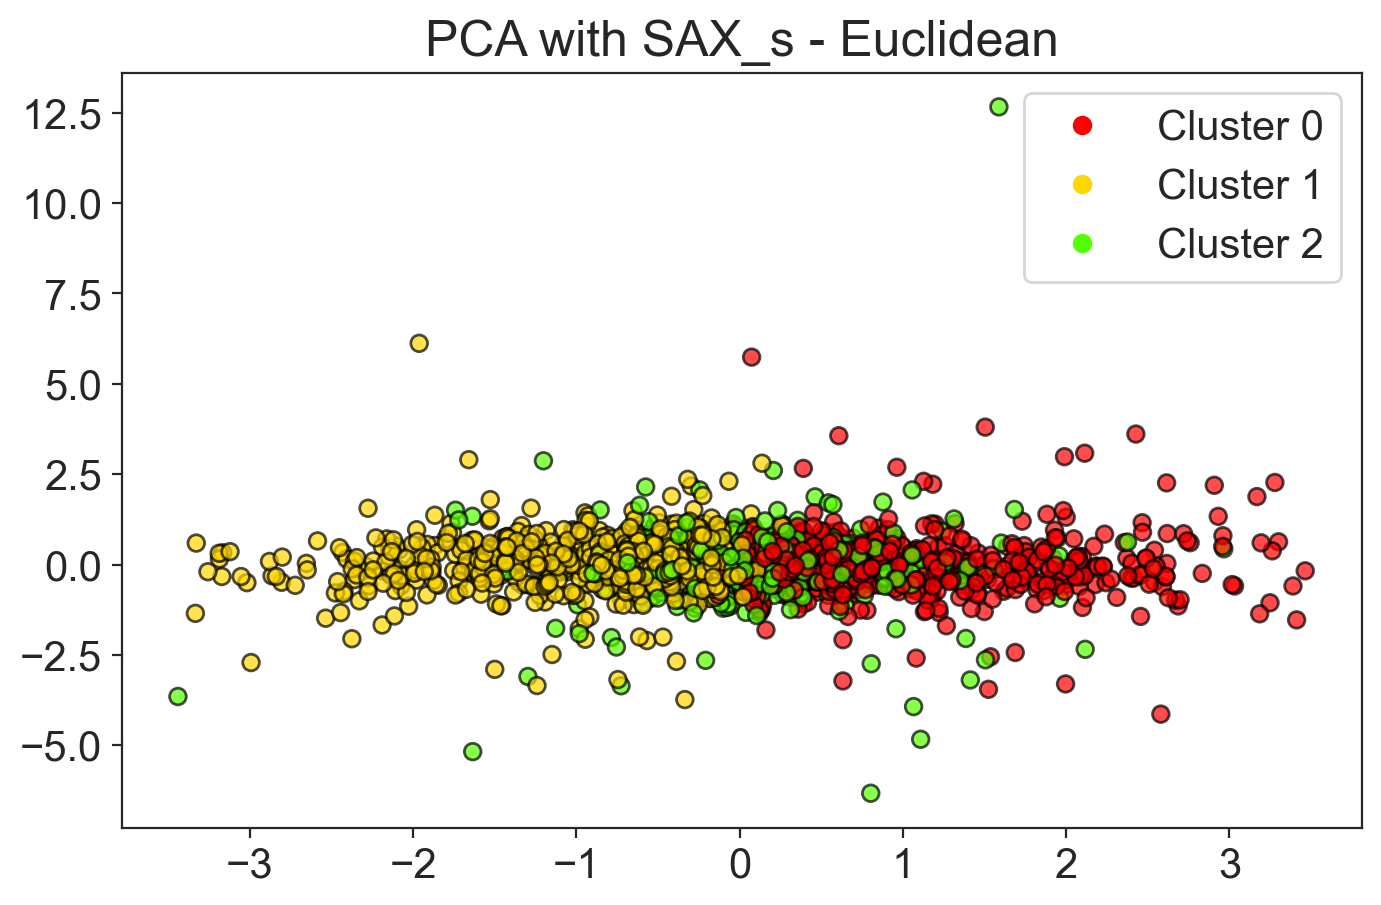

In [24]:
# Your code for scatter plot here
plt.scatter(X_train_saxs_pca[:, 0], X_train_saxs_pca[:, 1], c=labels_saxs_e, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)

# Assuming labels_dft_d is a list/array containing the cluster labels for each data point

# Create a list of unique cluster labels
unique_labels = list(set(labels_saxs_e))

# Assign a color for each cluster label
colors = plt.cm.prism(np.linspace(0, 1, len(unique_labels)))

# Create a legend entry for each cluster label
legend_entries = []
for label, color in zip(unique_labels, colors):
    legend_entries.append(plt.Line2D([], [], marker='o', linestyle='', color=color, label=f'Cluster {label}'))

# Add the legend with the created entries
plt.legend(handles=legend_entries)
plt.title('PCA with SAX_s - Euclidean')
plt.show()


In [26]:
from sklearn.manifold import Isomap
iso = Isomap(n_components=2)
X_train_saxs_iso = iso.fit_transform(x_train_sax_small)
X_train_saxs_iso.shape

(1828, 2)

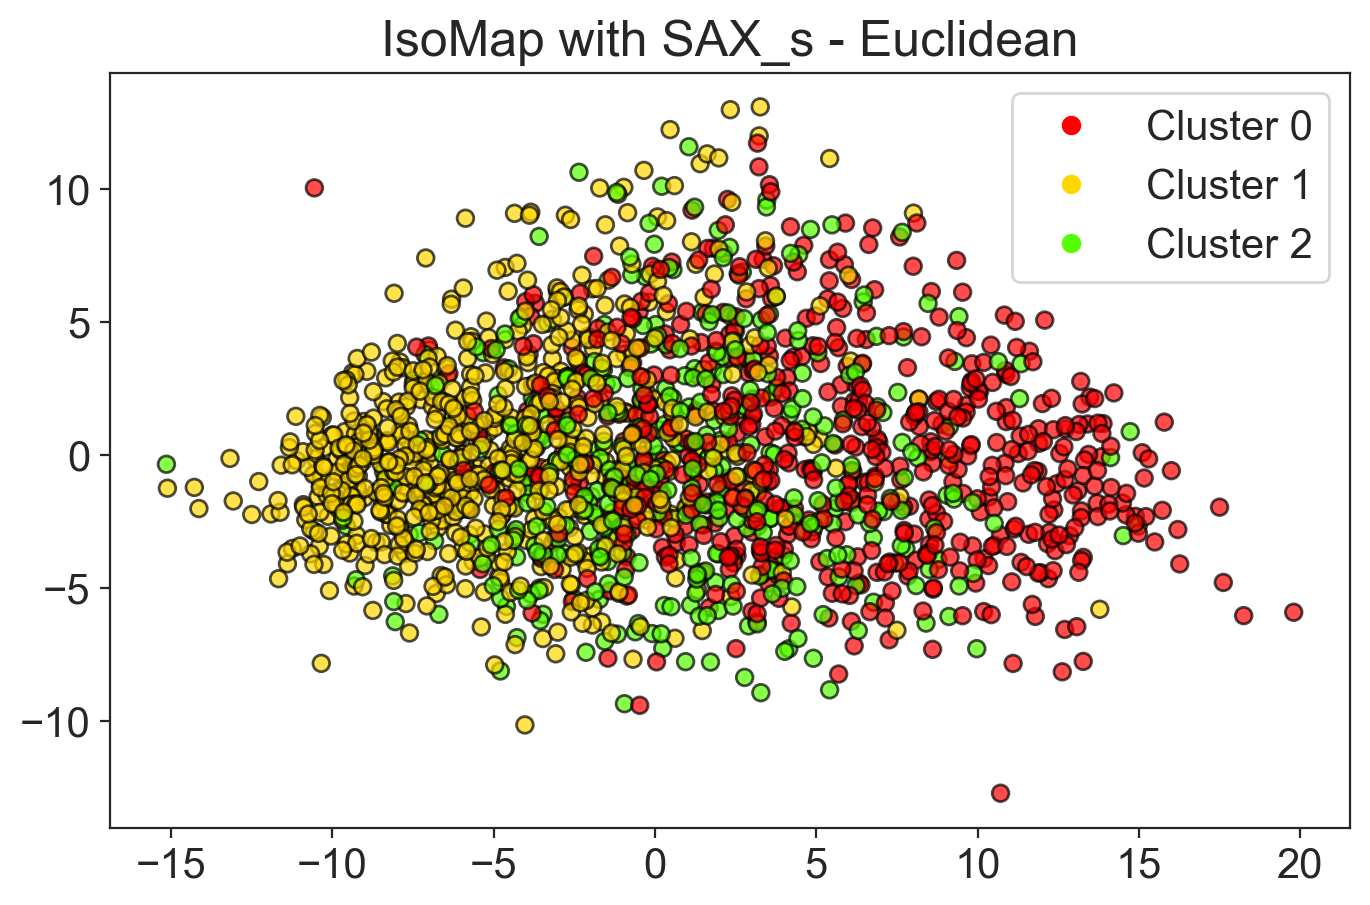

In [28]:
plt.scatter(X_train_saxs_iso[:, 0], X_train_saxs_iso[:, 1], c=labels_saxs_e, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)

# Create a list of unique cluster labels
unique_labels = list(set(labels_saxs_e))

# Assign a color for each cluster label
colors = plt.cm.prism(np.linspace(0, 1, len(unique_labels)))

# Create a legend entry for each cluster label
legend_entries = []
for label, color in zip(unique_labels, colors):
    legend_entries.append(plt.Line2D([], [], marker='o', linestyle='', color=color, label=f'Cluster {label}'))

# Add the legend with the created entries
plt.legend(handles=legend_entries)
plt.title('IsoMap with SAX_s - Euclidean')

plt.show()
